Este modelo híbrido de machine learning combina la capacidad predictiva de dos modelos diferentes.

In [153]:
import pandas as pd
data = pd.read_csv("./apple_stock_data.csv")

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timezone
import datetime as dt
data.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [157]:
data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,199.088202,199.454286,201.093056,197.608373,199.316032,5.832214e+07
std,21.511933,21.321567,21.571427,20.963034,21.365476,3.025771e+07
min,164.585999,165.000000,166.399994,164.080002,165.350006,2.404830e+07
25%,182.254063,182.852501,184.617504,181.487499,182.777504,4.278855e+07
50%,192.370026,193.084999,194.399994,191.724998,192.989998,5.174865e+07
75%,221.697502,221.697502,224.149994,219.717499,221.635002,6.497460e+07
max,236.479996,236.479996,237.490005,234.449997,236.479996,3.186799e+08


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Adj Close  252 non-null    float64
 2   Close      252 non-null    float64
 3   High       252 non-null    float64
 4   Low        252 non-null    float64
 5   Open       252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [161]:
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date",inplace=True)
data=data[["Close"]]

<Axes: xlabel='Close', ylabel='Count'>

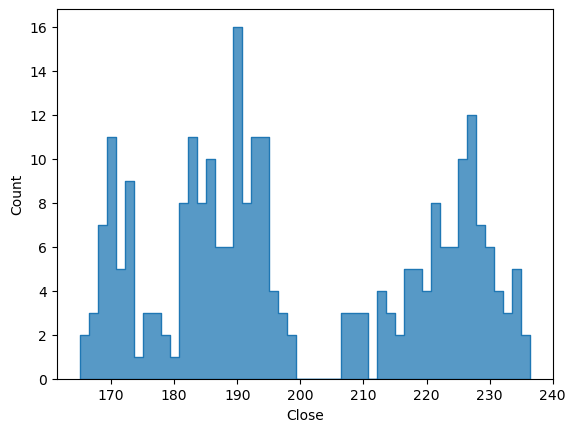

In [197]:
sns.histplot(x=data["Close"],bins=50, element="step")

In [223]:
data.index

DatetimeIndex(['2023-11-02 00:00:00+00:00', '2023-11-03 00:00:00+00:00',
               '2023-11-06 00:00:00+00:00', '2023-11-07 00:00:00+00:00',
               '2023-11-08 00:00:00+00:00', '2023-11-09 00:00:00+00:00',
               '2023-11-10 00:00:00+00:00', '2023-11-13 00:00:00+00:00',
               '2023-11-14 00:00:00+00:00', '2023-11-15 00:00:00+00:00',
               ...
               '2024-10-21 00:00:00+00:00', '2024-10-22 00:00:00+00:00',
               '2024-10-23 00:00:00+00:00', '2024-10-24 00:00:00+00:00',
               '2024-10-25 00:00:00+00:00', '2024-10-28 00:00:00+00:00',
               '2024-10-29 00:00:00+00:00', '2024-10-30 00:00:00+00:00',
               '2024-10-31 00:00:00+00:00', '2024-11-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=252, freq=None)

<Axes: xlabel='Date', ylabel='Close'>

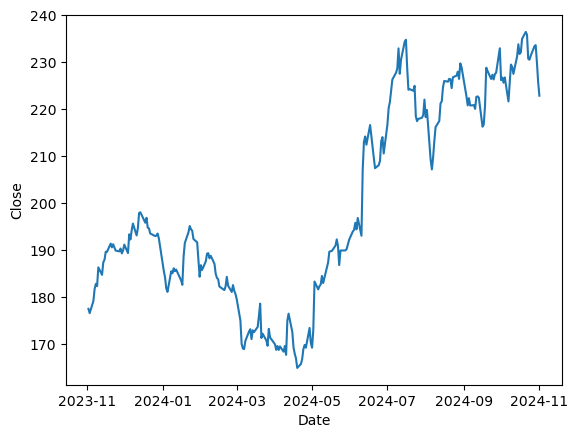

In [249]:
sns.lineplot(x=data.index,y=data["Close"])

## Modelos

- LSTM: captura secuencialmente los patrones y se actualiza a corto plazo.
- Regresión lineal: relaciones lineales en tendencias a largo plazo.

In [253]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data['Close'] = scaler.fit_transform(data[['Close']])

In [286]:
from IPython.core.display import display, HTML

html_content = '''
<div style="font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, sans-serif;">
    <h1 style="color: #2962ff; border-bottom: 2px solid #2962ff; padding-bottom: 8px;">
        Normalización con MinMaxScaler 📊
    </h1>

    <div style="background-color: #f5f5f5; padding: 20px; border-radius: 8px; margin: 15px 0;">
        <p style="font-size: 1.1em; font-weight: 500; color: #333; margin-top: 0;">Usamos MinMaxScaler en un rango de [0,1] para:</p>
        <ul style="list-style-type: none; padding-left: 0; margin: 0;">
            <li style="margin: 8px 0; padding-left: 20px; position: relative;">
                <span style="position: absolute; left: 0; color: #2962ff;">▹</span>
                Prevenir el gradiente vanishing/exploding
            </li>
            <li style="margin: 8px 0; padding-left: 20px; position: relative;">
                <span style="position: absolute; left: 0; color: #2962ff;">▹</span>
                Las funciones sigmoides y tanh de activación trabajan mejor en este rango
            </li>
            <li style="margin: 8px 0; padding-left: 20px; position: relative;">
                <span style="position: absolute; left: 0; color: #2962ff;">▹</span>
                Para los precios de stocks, las relaciones relativas entre los valores es mucho más importante que sus valores absolutos
                <ul style="list-style-type: none; padding-left: 20px; margin-top: 5px;">
                    <li style="margin: 5px 0; padding-left: 20px; position: relative;">
                        <span style="position: absolute; left: 0; color: #666;">→</span>
                        MinMaxScaler preserva estas relaciones relativas dentro de cada característica
                    </li>
                </ul>
            </li>
        </ul>
    </div>

    <h2 style="color: #333; margin-top: 25px;">Comparación con otros scalers:</h2>
    <div style="display: grid; gap: 15px; margin-top: 15px;">
        <div style="background-color: white; border: 1px solid #e0e0e0; border-radius: 8px; padding: 15px;">
            <h3 style="color: #2962ff; margin: 0 0 10px 0;">StandardScaler</h3>
            <ul style="list-style-type: none; padding-left: 0; margin: 0;">
                <li style="margin: 5px 0; padding-left: 15px; position: relative;">
                    <span style="position: absolute; left: 0; color: #666;">•</span>
                    Centra los datos alrededor de la media (μ=0) con desviación estándar (σ=1)
                </li>
                <li style="margin: 5px 0; padding-left: 15px; position: relative;">
                    <span style="position: absolute; left: 0; color: #666;">•</span>
                    Puede producir valores negativos (no ideal para precios)
                </li>
                <li style="margin: 5px 0; padding-left: 15px; position: relative;">
                    <span style="position: absolute; left: 0; color: #666;">•</span>
                    Mejor cuando los datos siguen una distribución normal
                </li>
            </ul>
        </div>

        <div style="background-color: white; border: 1px solid #e0e0e0; border-radius: 8px; padding: 15px;">
            <h3 style="color: #2962ff; margin: 0 0 10px 0;">RobustScaler</h3>
            <ul style="list-style-type: none; padding-left: 0; margin: 0;">
                <li style="margin: 5px 0; padding-left: 15px; position: relative;">
                    <span style="position: absolute; left: 0; color: #666;">•</span>
                    Diseñado para datos con outliers
                </li>
                <li style="margin: 5px 0; padding-left: 15px; position: relative;">
                    <span style="position: absolute; left: 0; color: #666;">•</span>
                    En series temporales financieras, los "outliers" suelen ser señales importantes
                </li>
            </ul>
        </div>

        <div style="background-color: white; border: 1px solid #e0e0e0; border-radius: 8px; padding: 15px;">
            <h3 style="color: #2962ff; margin: 0 0 10px 0;">MaxAbsScaler</h3>
            <ul style="list-style-type: none; padding-left: 0; margin: 0;">
                <li style="margin: 5px 0; padding-left: 15px; position: relative;">
                    <span style="position: absolute; left: 0; color: #666;">•</span>
                    Similar a MinMaxScaler pero escala por el valor absoluto máximo
                </li>
                <li style="margin: 5px 0; padding-left: 15px; position: relative;">
                    <span style="position: absolute; left: 0; color: #666;">•</span>
                    No desplaza/centra los datos
                </li>
            </ul>
        </div>
    </div>
</div>
'''

display(HTML(html_content))

C:\Users\esco1\AppData\Local\Temp\ipykernel_1712\1895808003.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Usaremos secuencias de 30 días.

In [292]:
import numpy as np
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(data['Close'].values, seq_length)

Para mantener el orden secuencial de los datos, declaramos shuffle=False

In [295]:
from sklearn.model_selection import train_test_split

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# LSTM

In [302]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1)) # regresión

C:\Users\esco1\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [304]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.2041
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0379
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0181
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0199
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0128
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0113
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0091
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0085
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0087
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0096
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0089
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0086
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0078
Epoch 16/20
6/6 ━━━━━━━━━━━━━━━━━━

# Regresión lineal

Usamos 3 días (pasados) para:
- Incluir contexto histórico a corto plazo
- Sin excedernos para evitar el ruido
- Los mercados financieros exhiben patrones a corto plazo

In [412]:
data['Lag_1'] = data['Close'].shift(1)
data['Lag_2'] = data['Close'].shift(2)
data['Lag_3'] = data['Close'].shift(3)
data = data.dropna()

In [414]:
X_lin = data[['Lag_1', 'Lag_2', 'Lag_3']]
y_lin = data['Close']

In [416]:
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [458]:
start_idx = 30  # Same as LSTM sequence length
X_train_lin = train_data[['Lag_1', 'Lag_2', 'Lag_3']][start_idx:]
y_train_lin = train_data['Close'][start_idx:]
X_test_lin = test_data[['Lag_1', 'Lag_2', 'Lag_3']][start_idx:]
y_test_lin = test_data['Close'][start_idx:]


In [460]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train_lin, y_train_lin)

LinearRegression()

## Predicciones LSTM

In [463]:
lstm_predictions = lstm_model.predict(X_test_lstm.reshape(-1, seq_length, 1))
lstm_predictions = scaler.inverse_transform(lstm_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


## Predicciones lineales

In [465]:
lin_predictions = lin_model.predict(X_test_lin)
lin_predictions = scaler.inverse_transform(lin_predictions.reshape(-1, 1))


## Predicciones híbridas

In [467]:
min_length = min(len(lstm_predictions), len(lin_predictions))
lstm_predictions = lstm_predictions[:min_length]
lin_predictions = lin_predictions[:min_length]


In [469]:
hybrid_predictions = (0.7 * lstm_predictions) + (0.3 * lin_predictions)

# Predicciones para los próximos 10 días

### LSTM

In [474]:
lstm_future_predictions = []
last_sequence = X[-1].reshape(1, seq_length, 1)
for _ in range(10):
    lstm_pred = lstm_model.predict(last_sequence)[0, 0]
    lstm_future_predictions.append(lstm_pred)
    lstm_pred_reshaped = np.array([[lstm_pred]]).reshape(1, 1, 1)
    last_sequence = np.append(last_sequence[:, 1:, :], lstm_pred_reshaped, axis=1)
lstm_future_predictions = scaler.inverse_transform(np.array(lstm_future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


### Lineal

In [478]:
recent_data = data['Close'].values[-3:]
lin_future_predictions = []
for _ in range(10):
    lin_pred = lin_model.predict(recent_data.reshape(1, -1))[0]
    lin_future_predictions.append(lin_pred)
    recent_data = np.append(recent_data[1:], lin_pred)
lin_future_predictions = scaler.inverse_transform(np.array(lin_future_predictions).reshape(-1, 1))

C:\Users\esco1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\esco1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\esco1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\esco1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\esco1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\esco1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not ha

### Híbrido

In [481]:
hybrid_future_predictions = (0.7 * lstm_future_predictions) + (0.3 * lin_future_predictions)

In [483]:
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=10)
predictions_df = pd.DataFrame({
    'Date': future_dates,
    'LSTM Predictions': lstm_future_predictions.flatten(),
    'Linear Regression Predictions': lin_future_predictions.flatten(),
    'Hybrid Model Predictions': hybrid_future_predictions.flatten()
})
print(predictions_df)

                       Date  LSTM Predictions  Linear Regression Predictions  \
0 2024-11-02 00:00:00+00:00        234.184692                     230.541670   
1 2024-11-03 00:00:00+00:00        233.900101                     226.237535   
2 2024-11-04 00:00:00+00:00        233.832062                     222.470891   
3 2024-11-05 00:00:00+00:00        233.910873                     230.993226   
4 2024-11-06 00:00:00+00:00        234.090027                     226.619824   
5 2024-11-07 00:00:00+00:00        234.336365                     221.964930   
6 2024-11-08 00:00:00+00:00        234.627533                     231.451610   
7 2024-11-09 00:00:00+00:00        234.946976                     227.065787   
8 2024-11-10 00:00:00+00:00        235.287033                     221.386481   
9 2024-11-11 00:00:00+00:00        235.640427                     231.912894   

   Hybrid Model Predictions  
0                233.091777  
1                231.601332  
2                230.423701  